<a href="https://colab.research.google.com/github/Baljitsingh677/Data-jinn/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mounting to Google drive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install tensorflow-gpu==2.0

In [0]:
!pip install mlxtend==0.17.0 

In [12]:
# Importing  the keras library and packages for CNN
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.0.0


In [0]:
# Importing supporting libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [0]:
# Data downloaded from kaggle or cfar10 directly
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# creating list of classes or images
classes_name  = ['airplane', 'automobile', 'bird', 'cat', 'dog', 'deer', 'frog', 'horse', 'ship','truck']

In [0]:
X_train.max()

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train.shape

In [0]:
X_test.shape

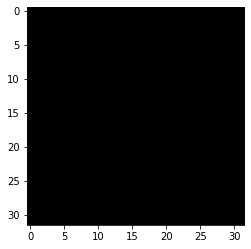

In [28]:
plt.imshow(X_test[0])

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## `Build CNN Model`

In [0]:
# Initialising the CNN
classifier = Sequential()
# Step 1 Convolution
classifier.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[32, 32, 3]))

classifier.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
classifier.add(Dropout(0.5))

classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=10, activation='softmax'))


In [41]:
classifier.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [44]:
history = classifier.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0976 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 2.3030 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 218s 4ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 219s 4ms/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 217s 4ms/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10

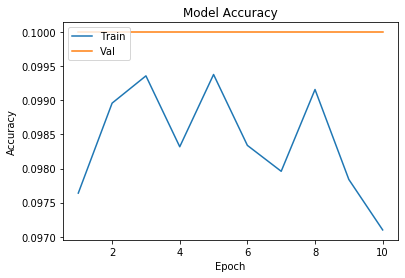

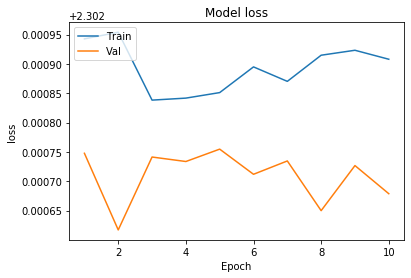

In [45]:
# Plot training and validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

In [58]:
y_pred = classifier.predict_classes(X_test)
y_pred

array([6, 6, 6, ..., 6, 6, 6])

In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0]])

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa31fe235f8>)

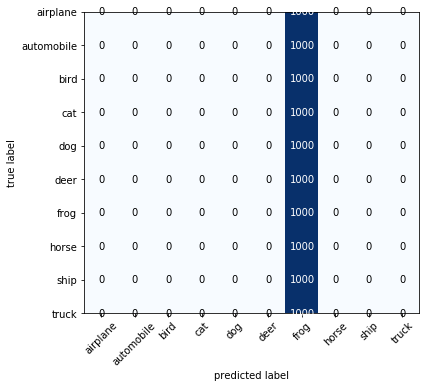

In [60]:
plot_confusion_matrix(cm, figsize=(6,6), class_names=classes_name)

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa3314f10b8>)

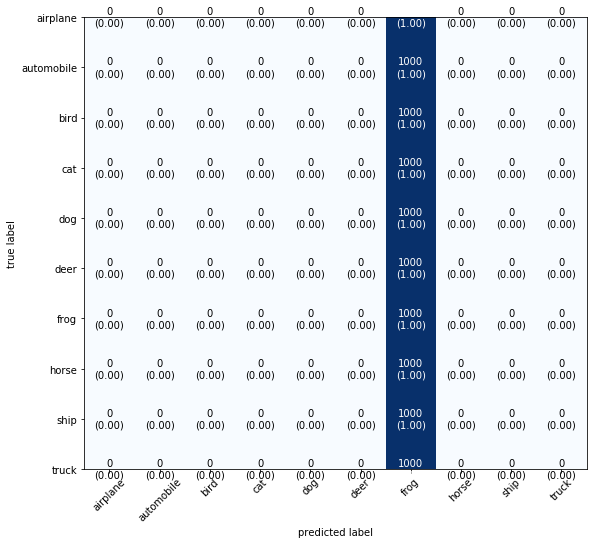

In [62]:
plot_confusion_matrix(cm, figsize=(9,9), class_names=classes_name, show_normed=True)